# Stacking Cells to Create Neural Network

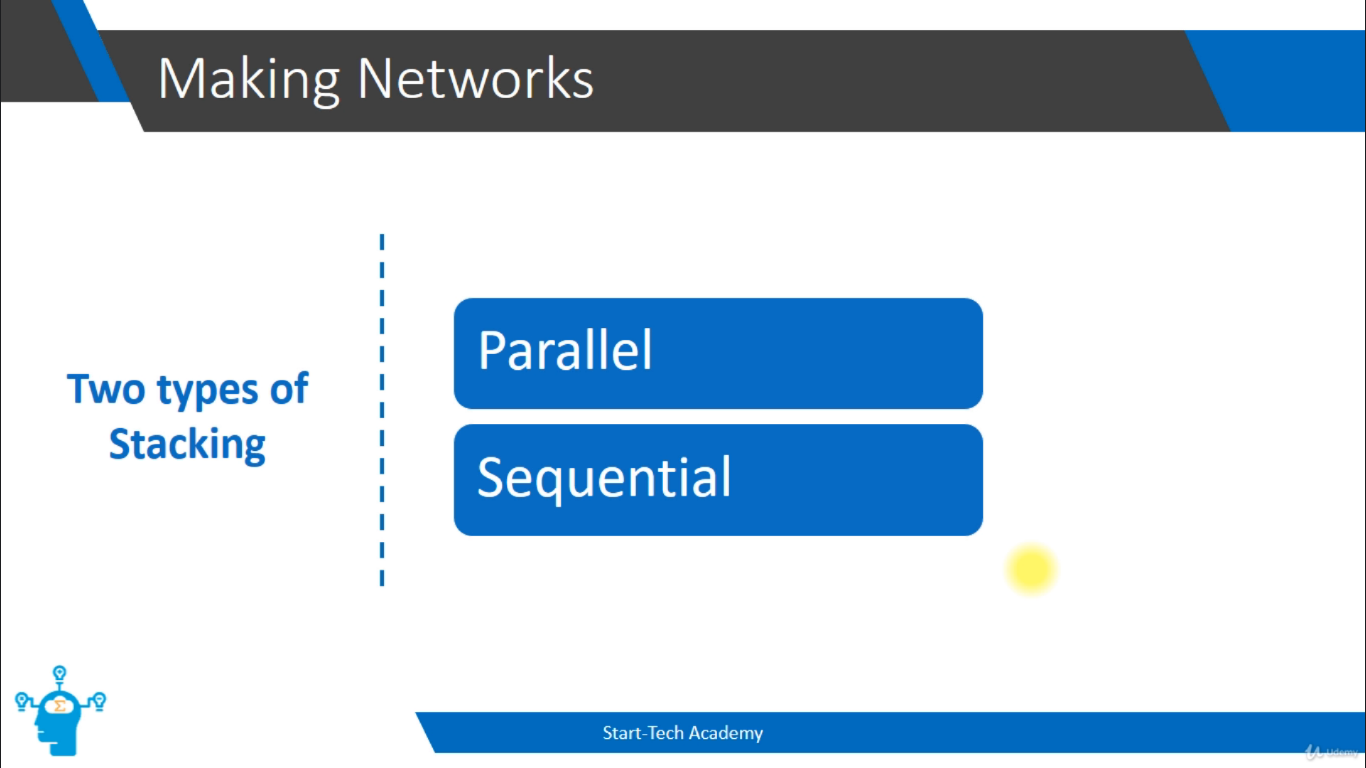

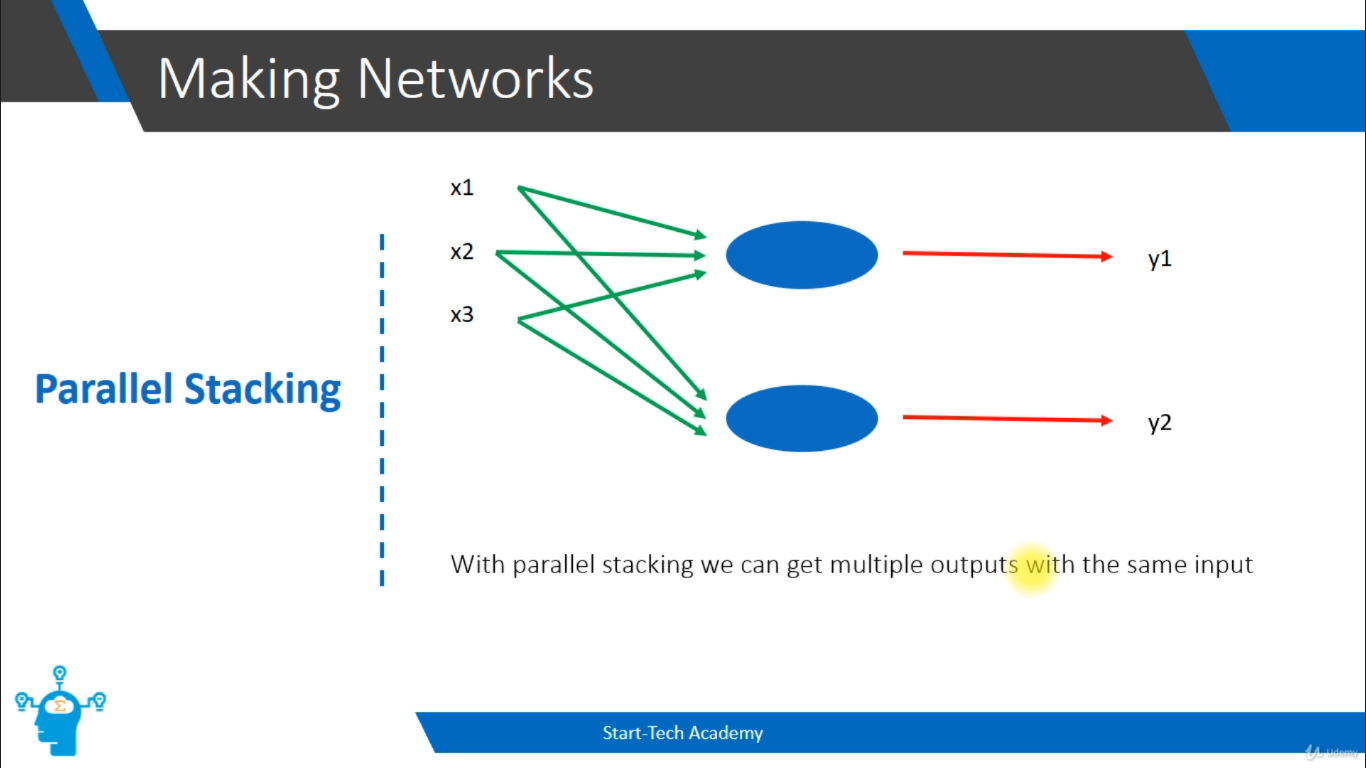

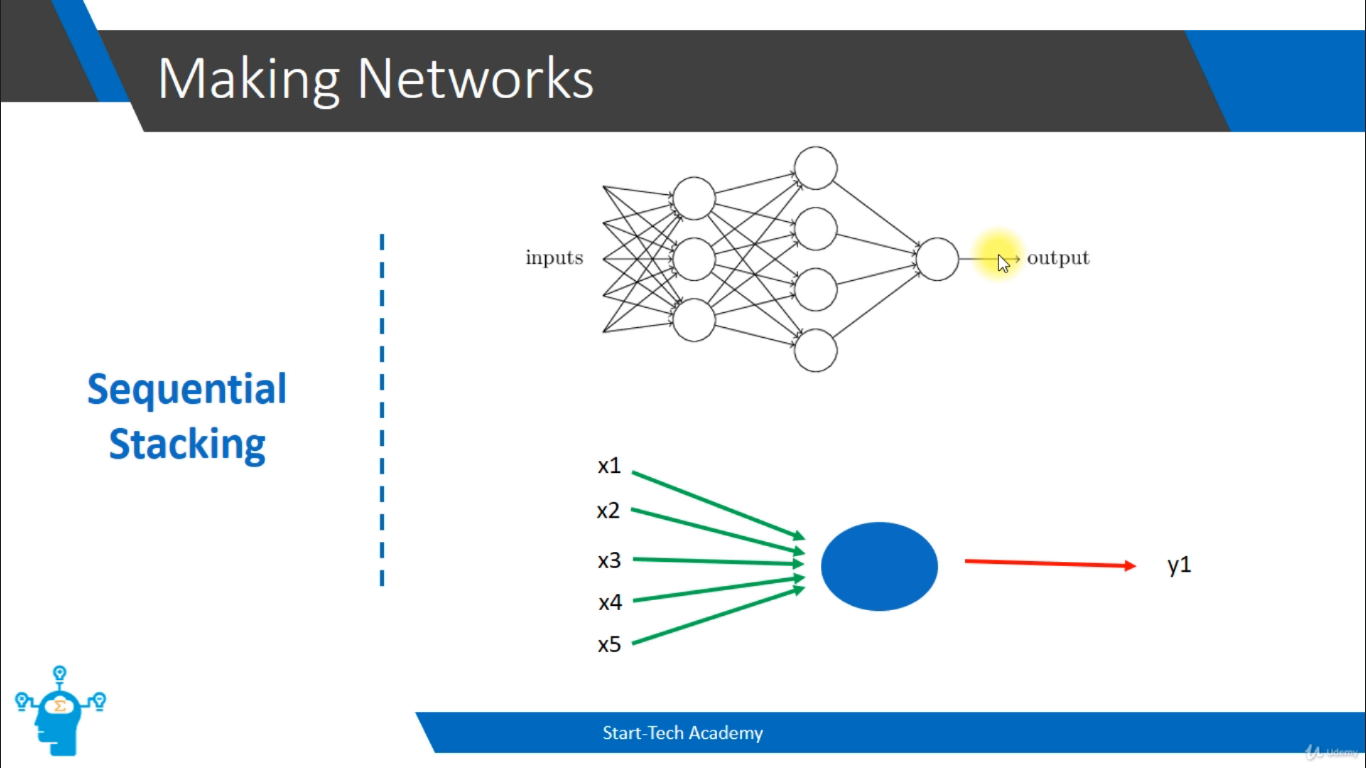

Let's first understand the benefit of doing this. That is why did we not just input all the five input into a single cell and use this output to predict the variable y. How is stacking these additional sets of neuron helpful?

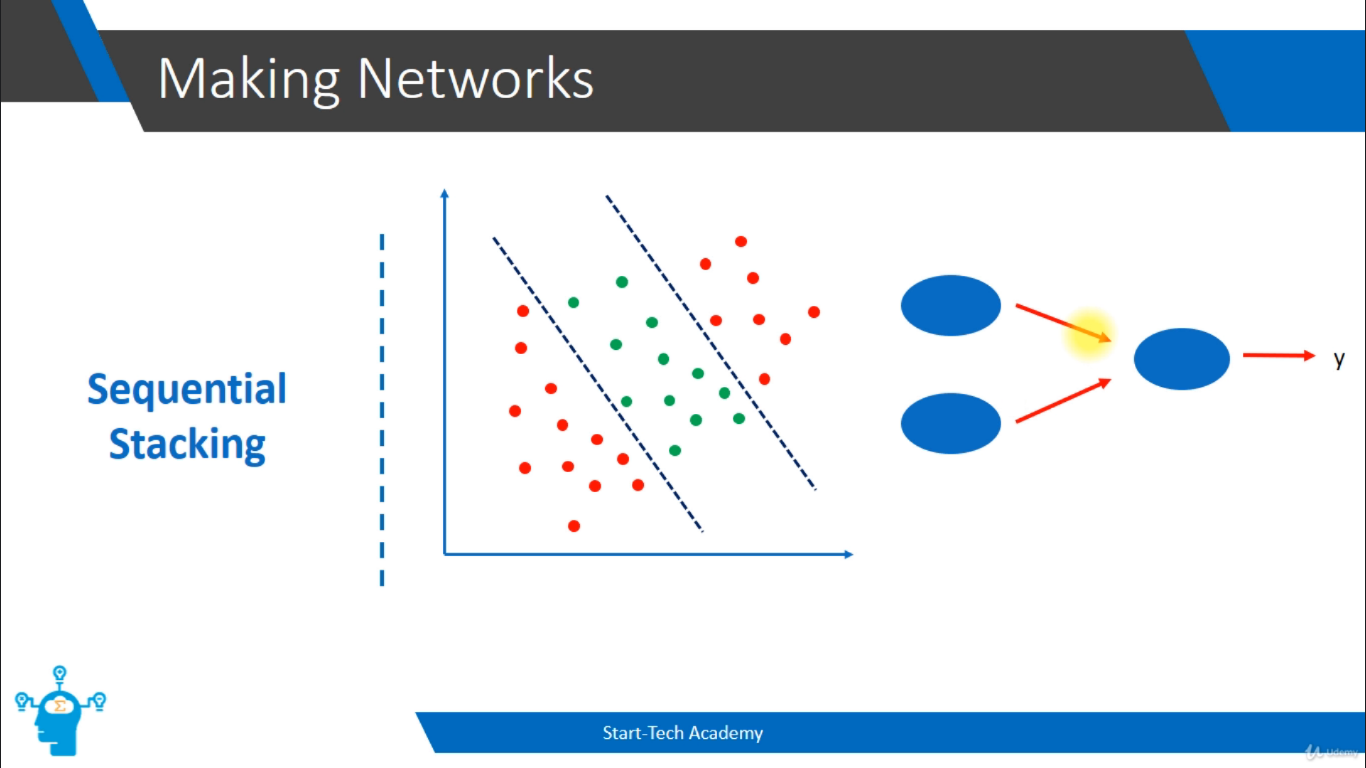

This is the power of a neural network. In the network we created, each neutron can focus on a particular feature of the object and not on the final output. The final output will be predicted.

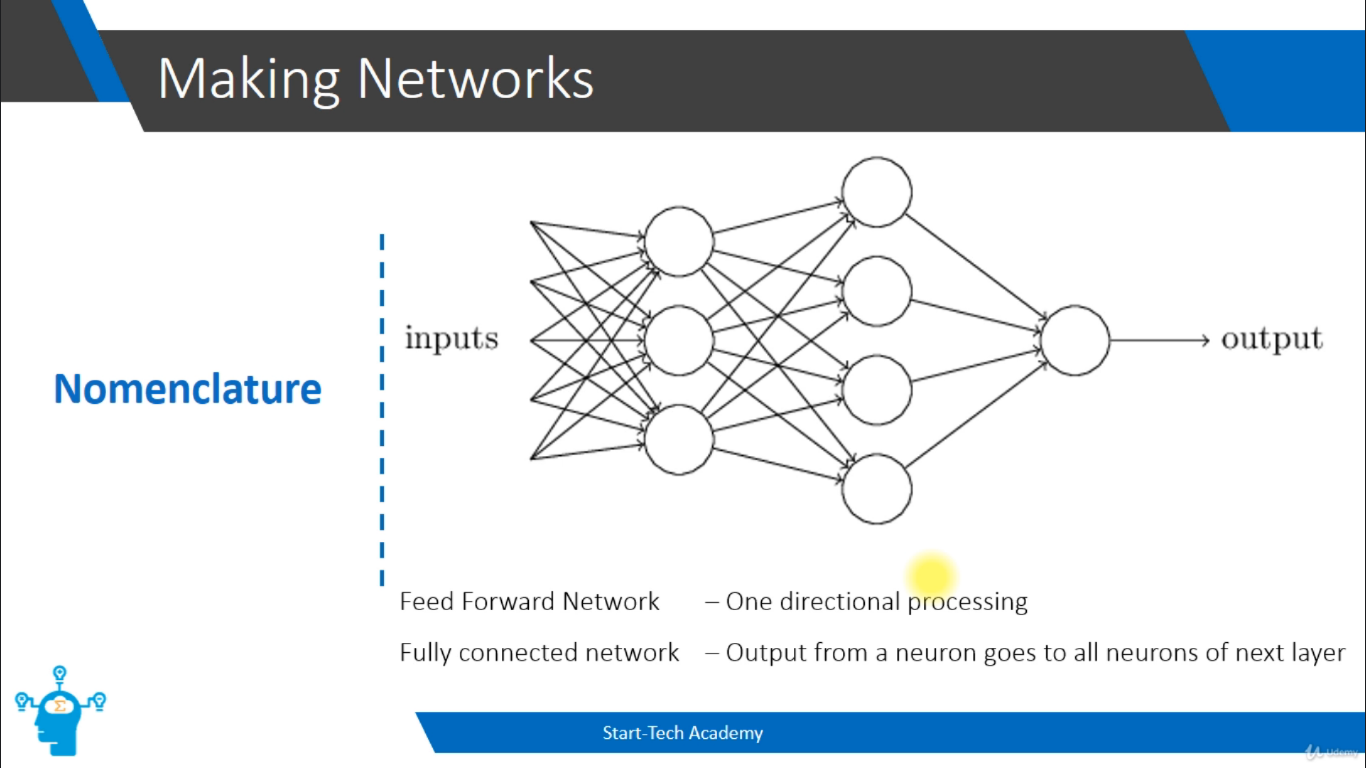

Also notice that the **process information** in this network is flowing in only the **forward direction**. Which is why such a network Is also called a **eed forward Network**. In comparison, if the **output** of one of the cells of that layer **goes back** as input to another cell of that layer only, then it is called a **cyclic network**. **Recurrent neural networks** Also known as **RNN**, are example of cyclic Network. RNN are used in **natural language processing** and **language modeling**.

Also note that **every neuron** in **each layer**, is **connected** to **every other neuron** in the **adjacent forward Layer**. Therefore, this network is **fully connected**. If somehow some links were **missing**, we call it **partially connected**. But for most practical purposes, we use a fully connected network.

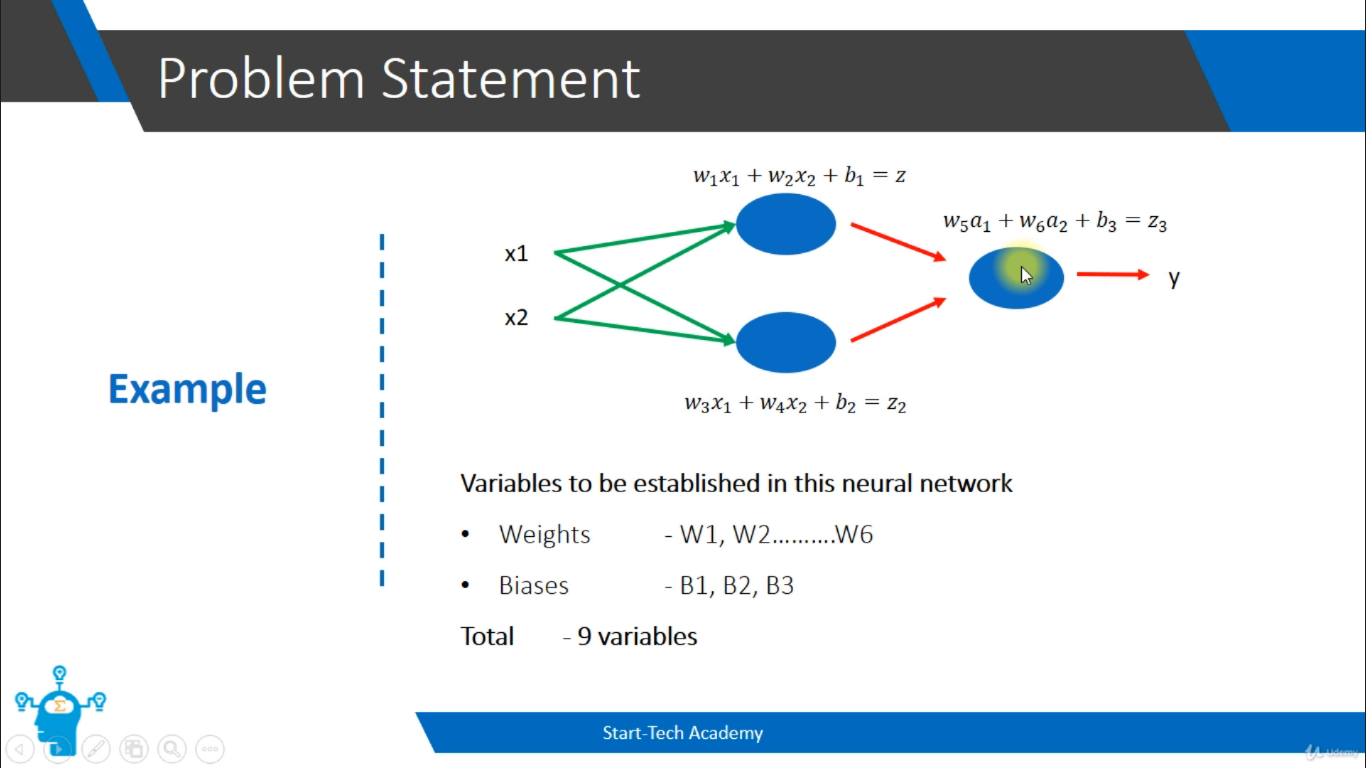

# Gradient Descent

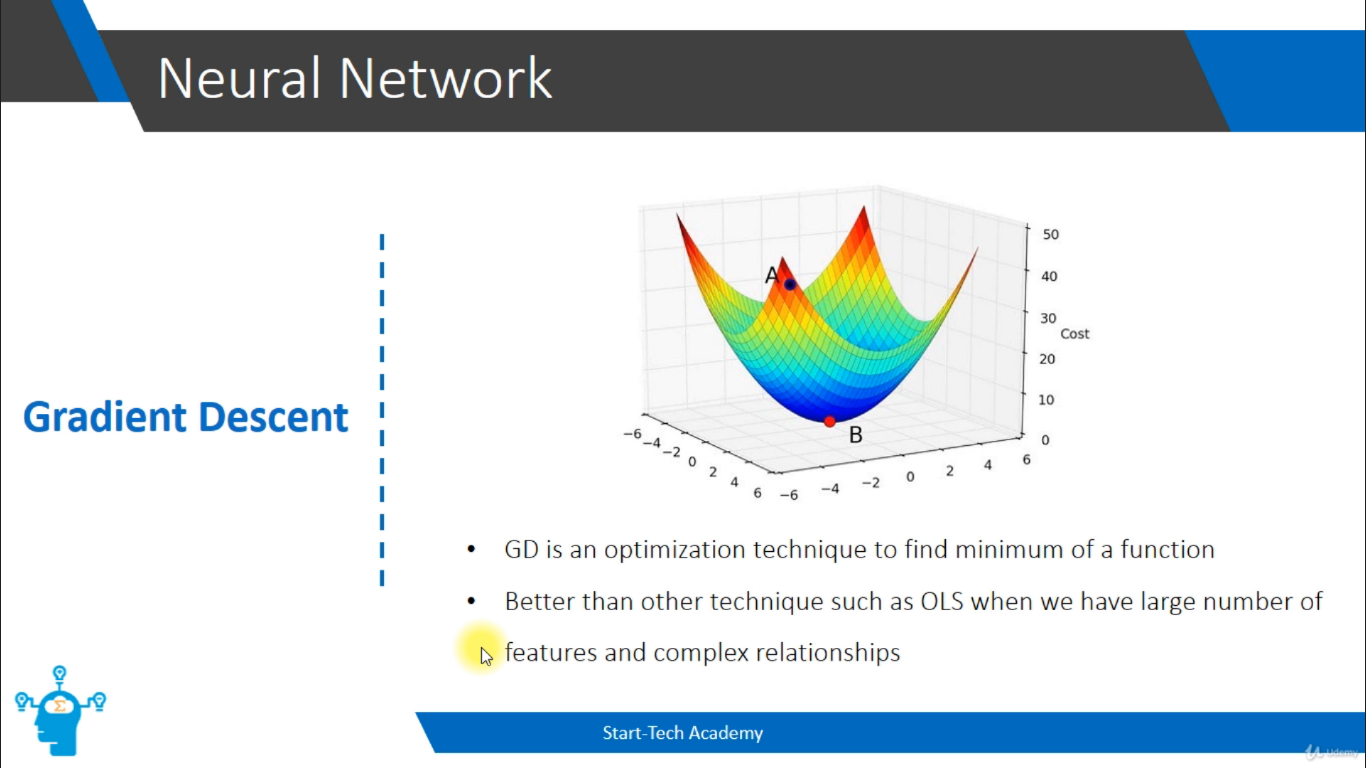

Gradient descent is just another optimization technique to find minimum of a function. There are other optimization techniques also, such as ordinarily squared, which is used in linear regression. But for a large number of features and complex relationships, gradient descent shows much better computational performance than any other technique. This means that if you have a large number of input variables and a very complex relationship between input on output, gradient descent will train the model in a much faster way as compared to other optimization.

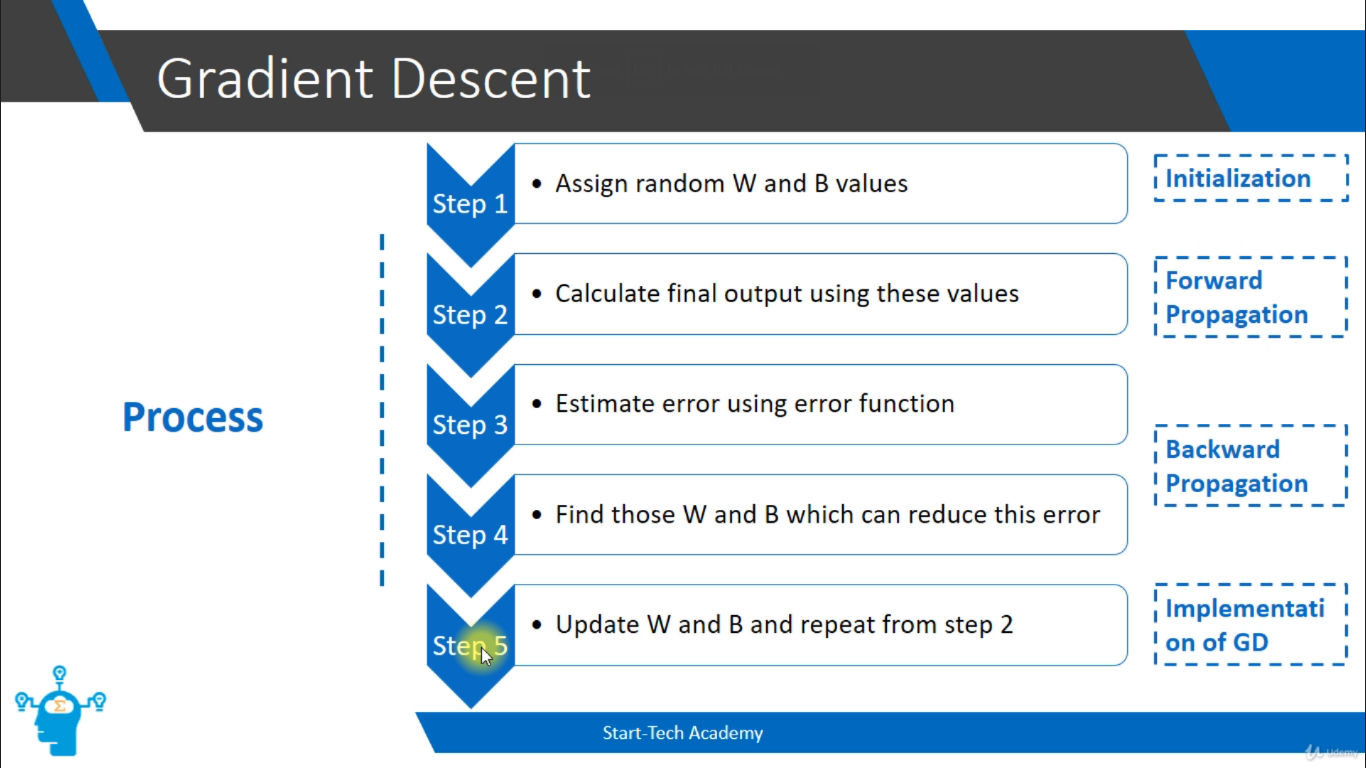

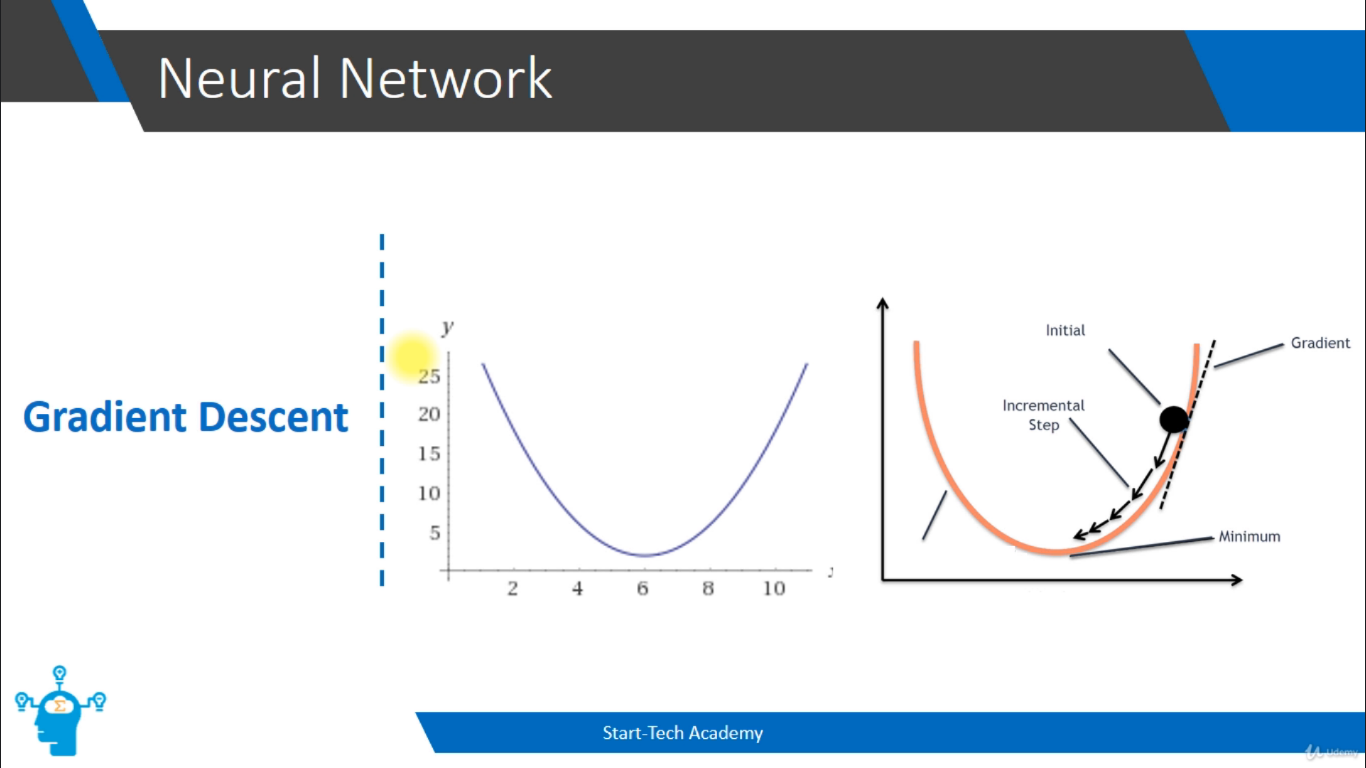

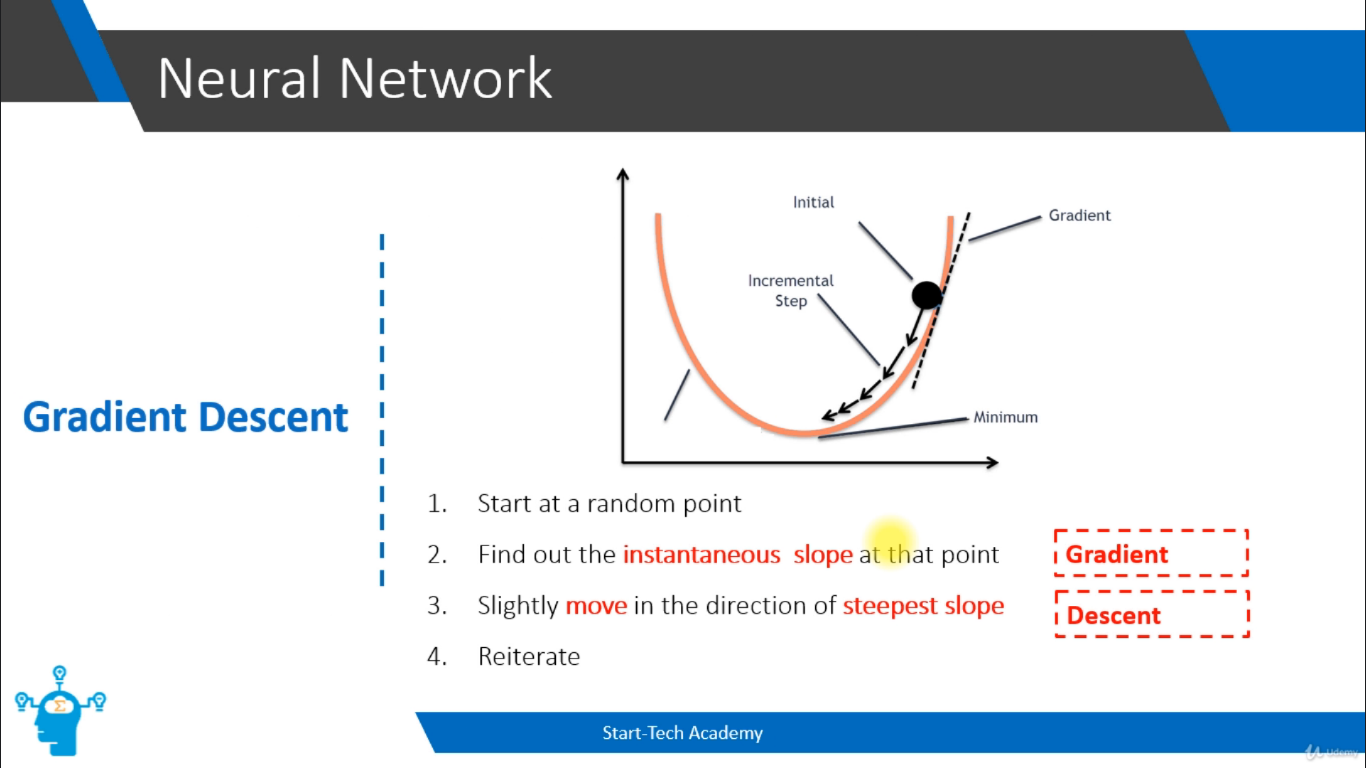

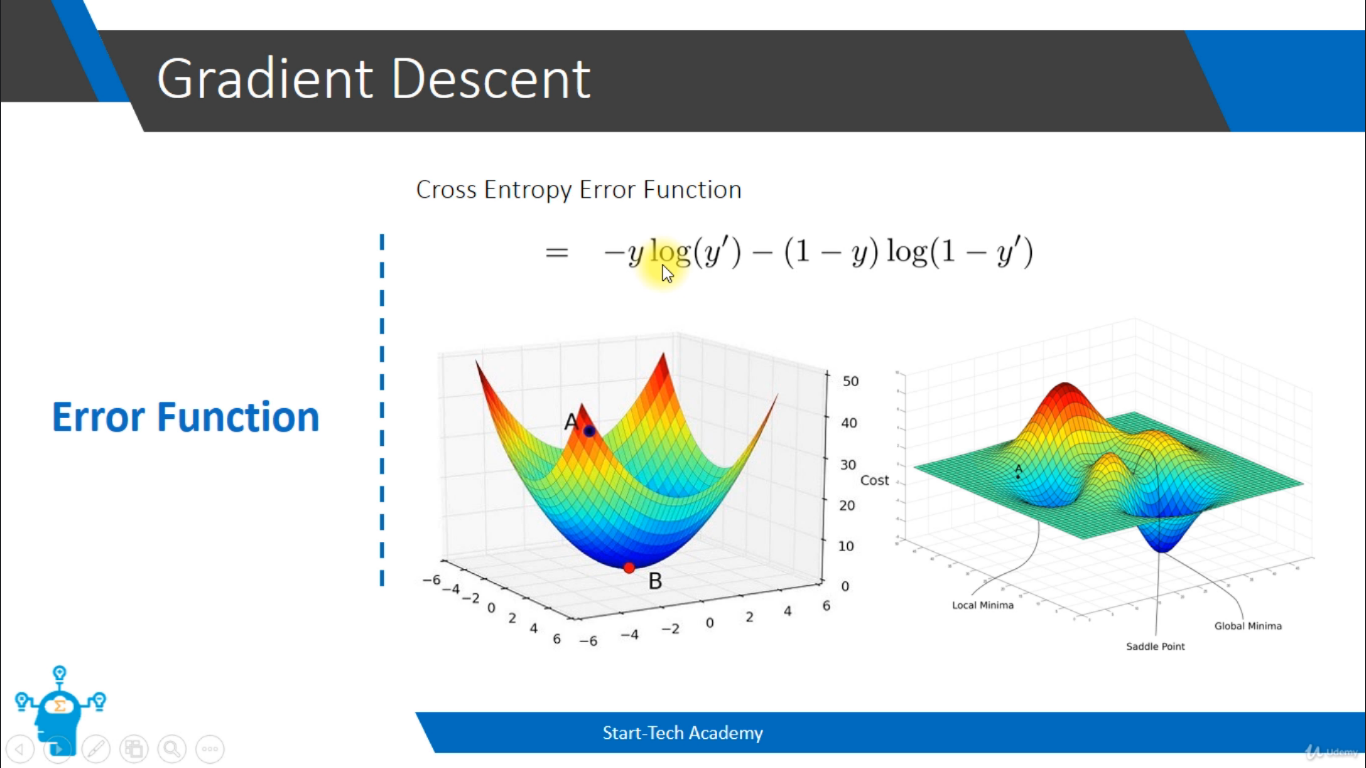

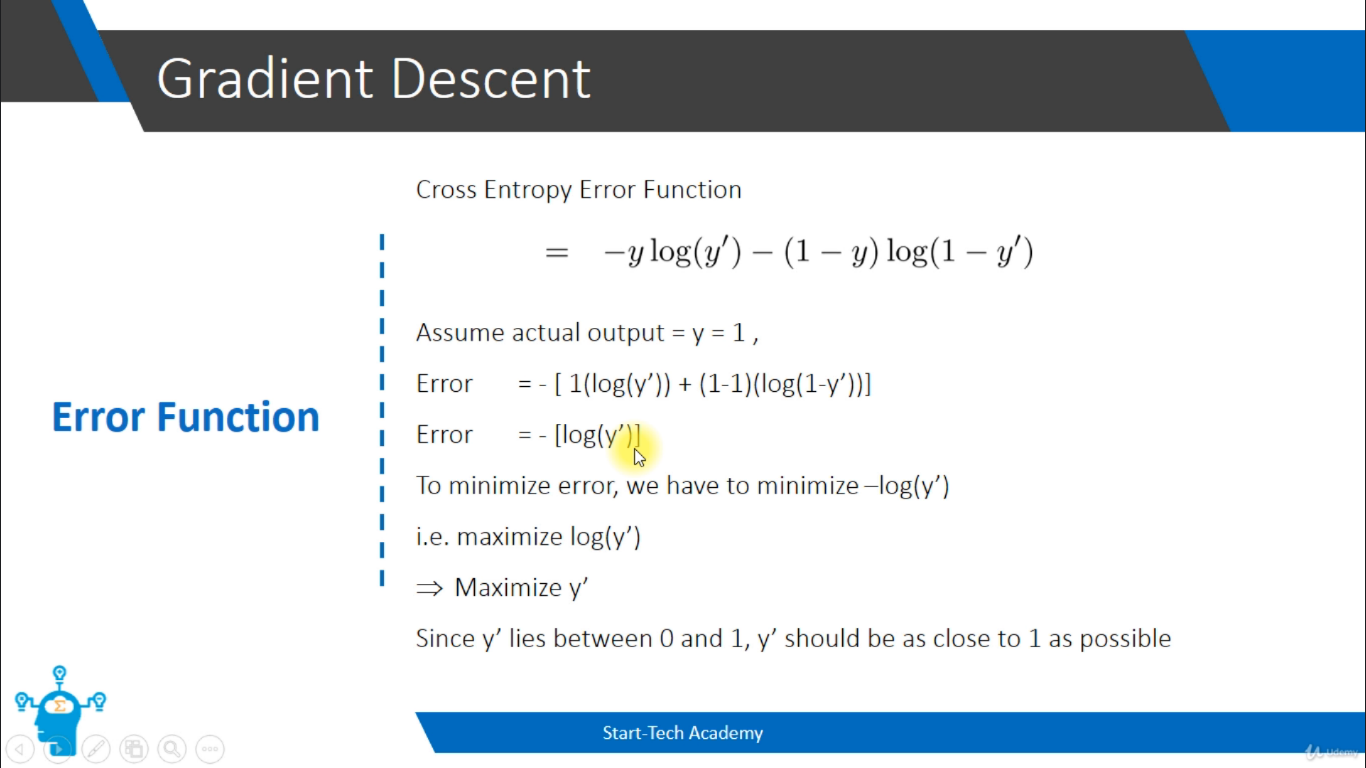

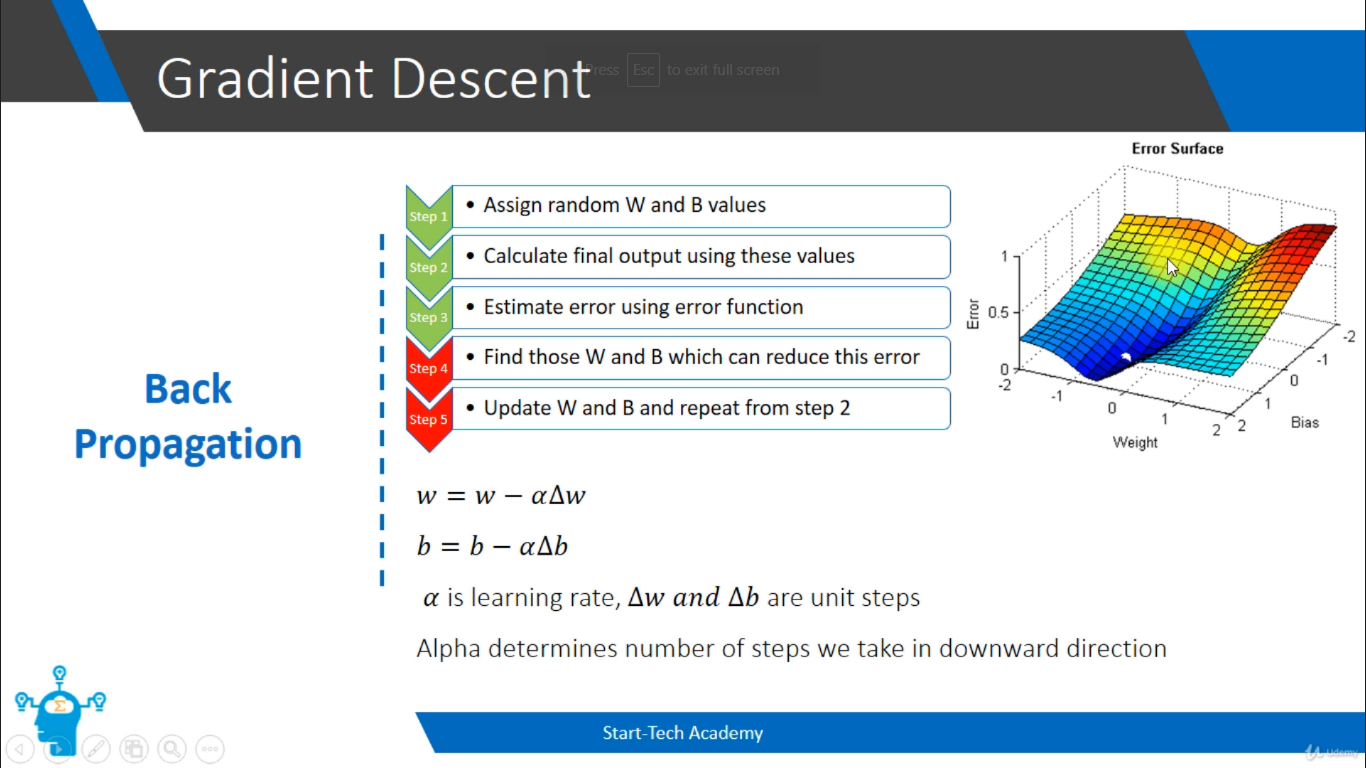

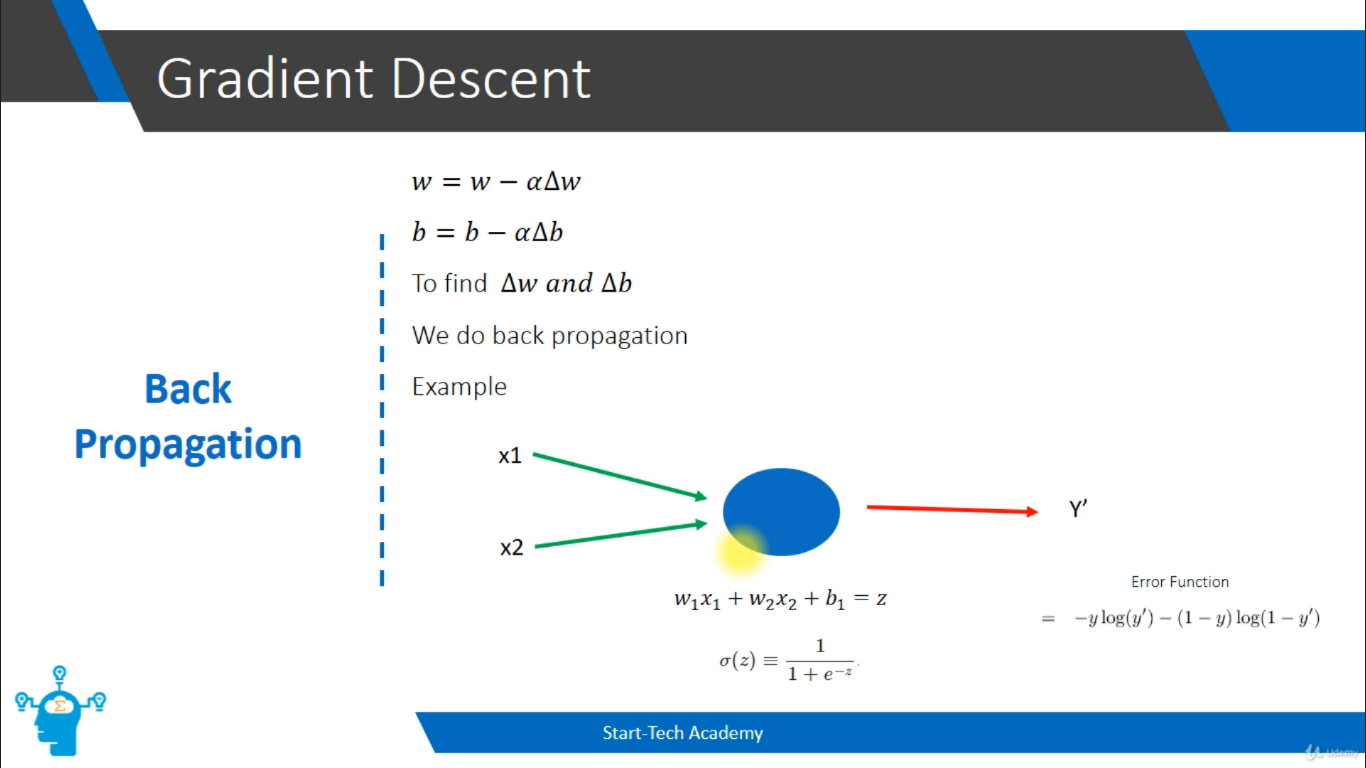

# Interview Questions

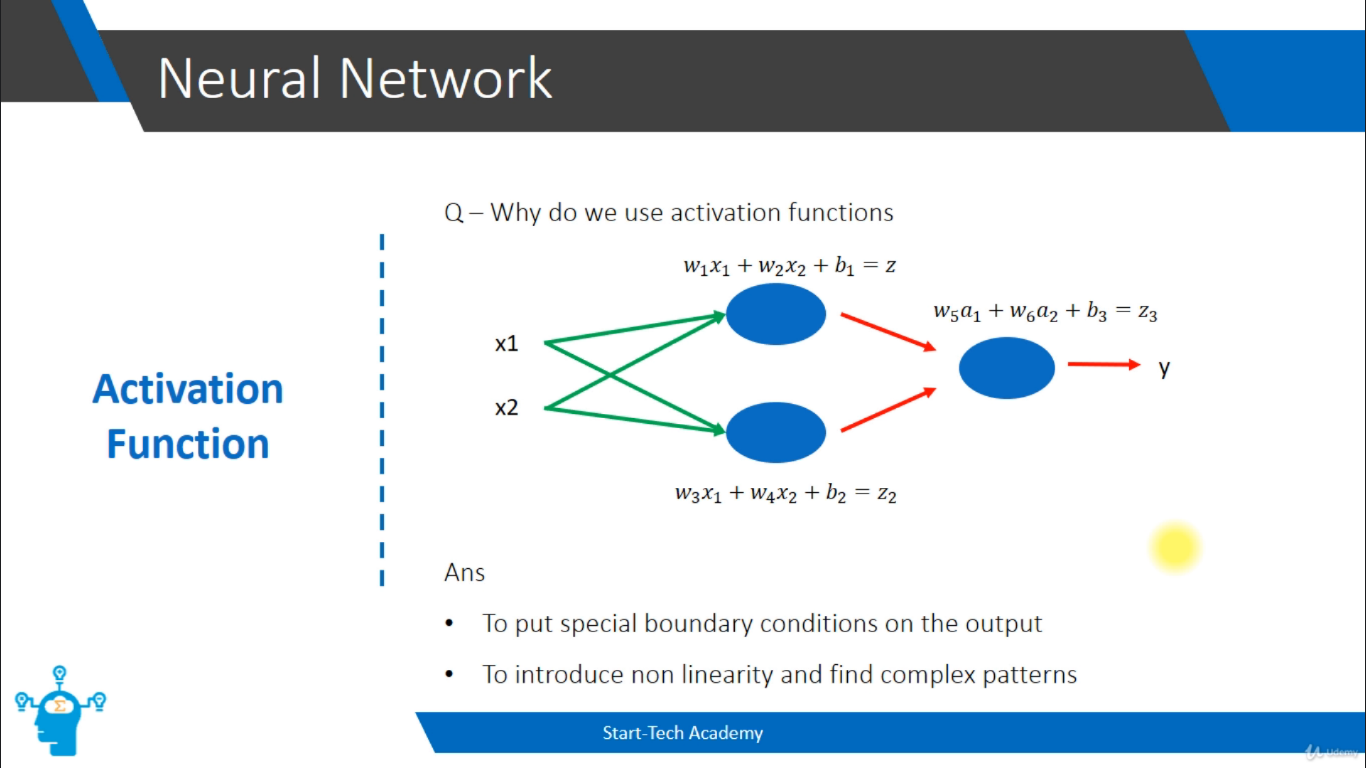

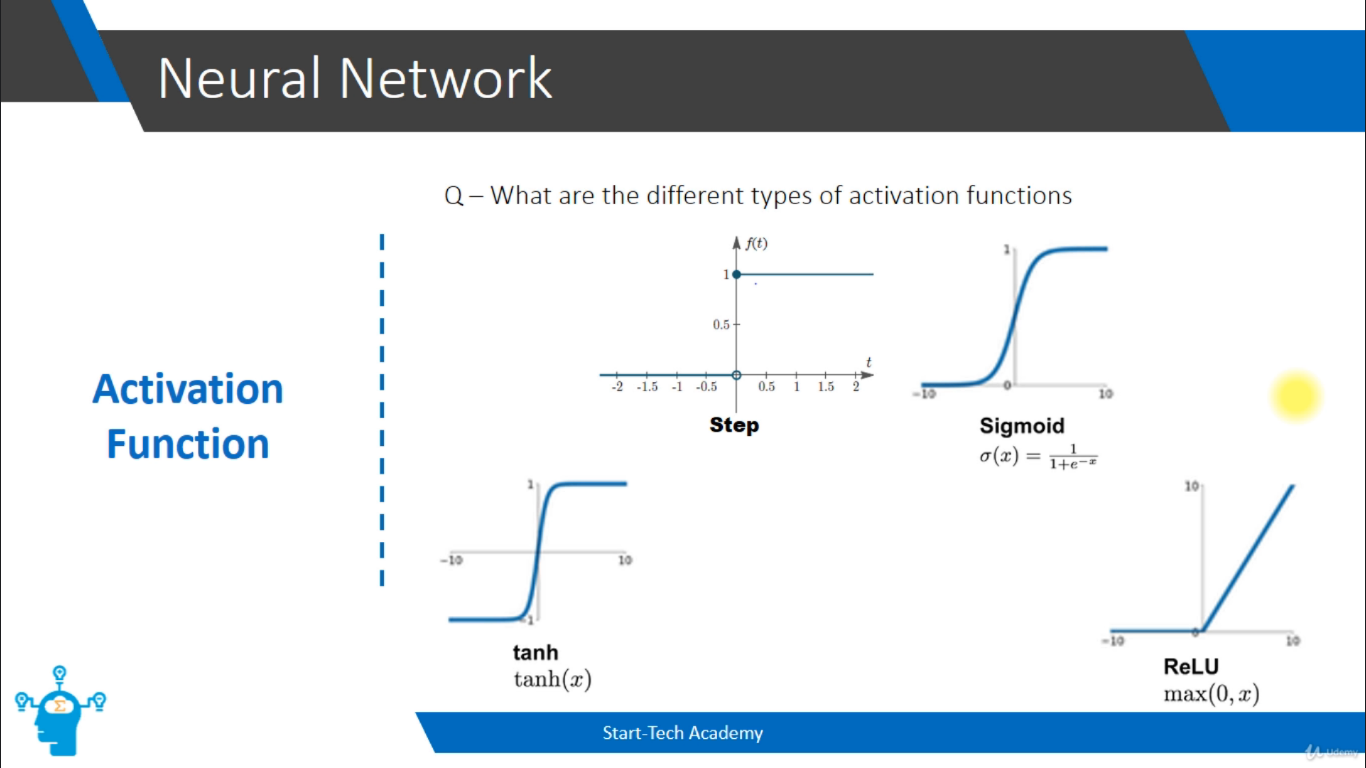

The hyperbolic tangent function The graph of this function is almost similar to the sigmoid in shape, but it has different boundaries. It has upper boundary of one at a lower boundary of minus one. And because it is centered at zero, it almost always has better converges efficiency than sigmoid. 

Relu, which is Short for rectify linear unit. It is very widely used function, especially in the hidden layers of regression neural networks. So the lower bound is zero, but there is no upper bound. This function performs well because it is very easy to execute. The reason for using this function in hidden layers is that this function introduces non-linearity in the hidden layers. However, on the output layer, it is rarely used because for classification, the right side of the function is not bounded and therefore it cannot be used. On the other hand, for regression. The left side of this function is bound and therefore this function cannot be used. So this function is good for activating hidden layers. But not for activating output layers.

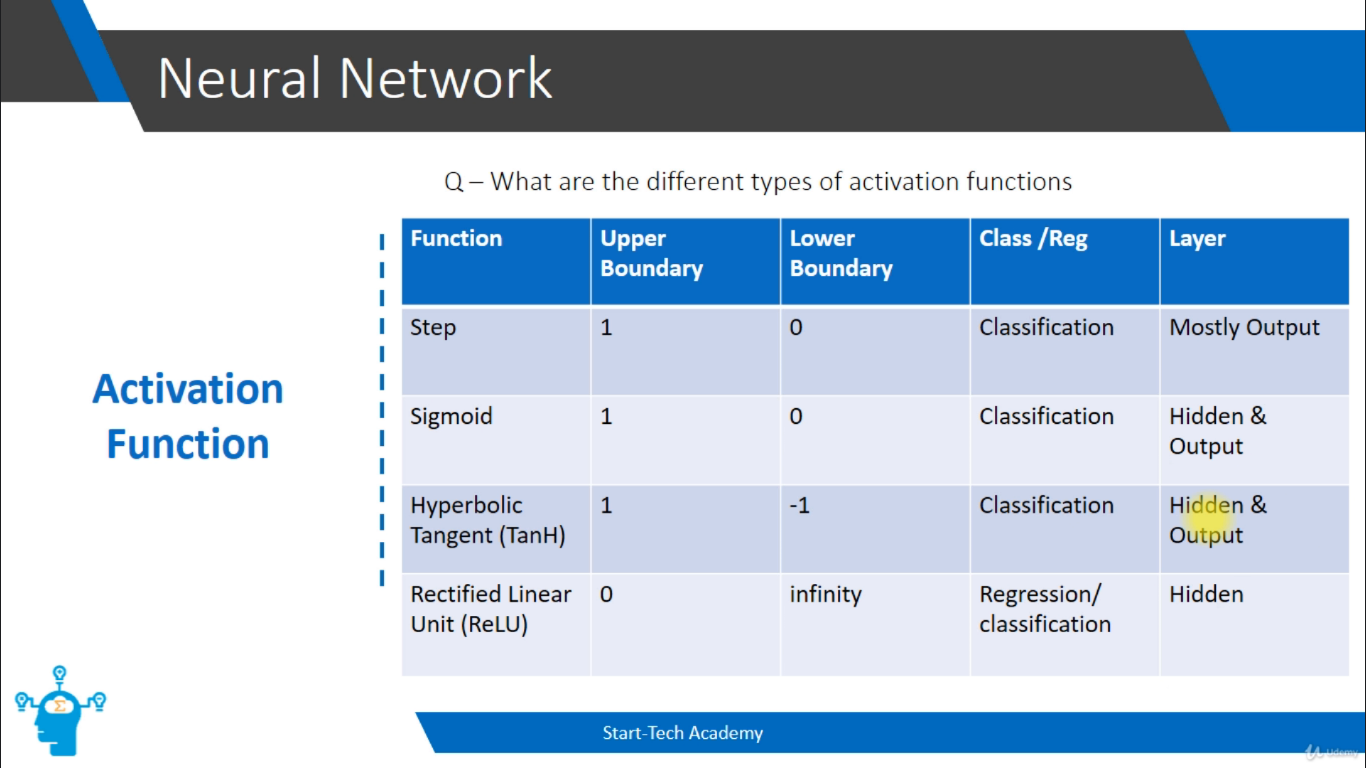

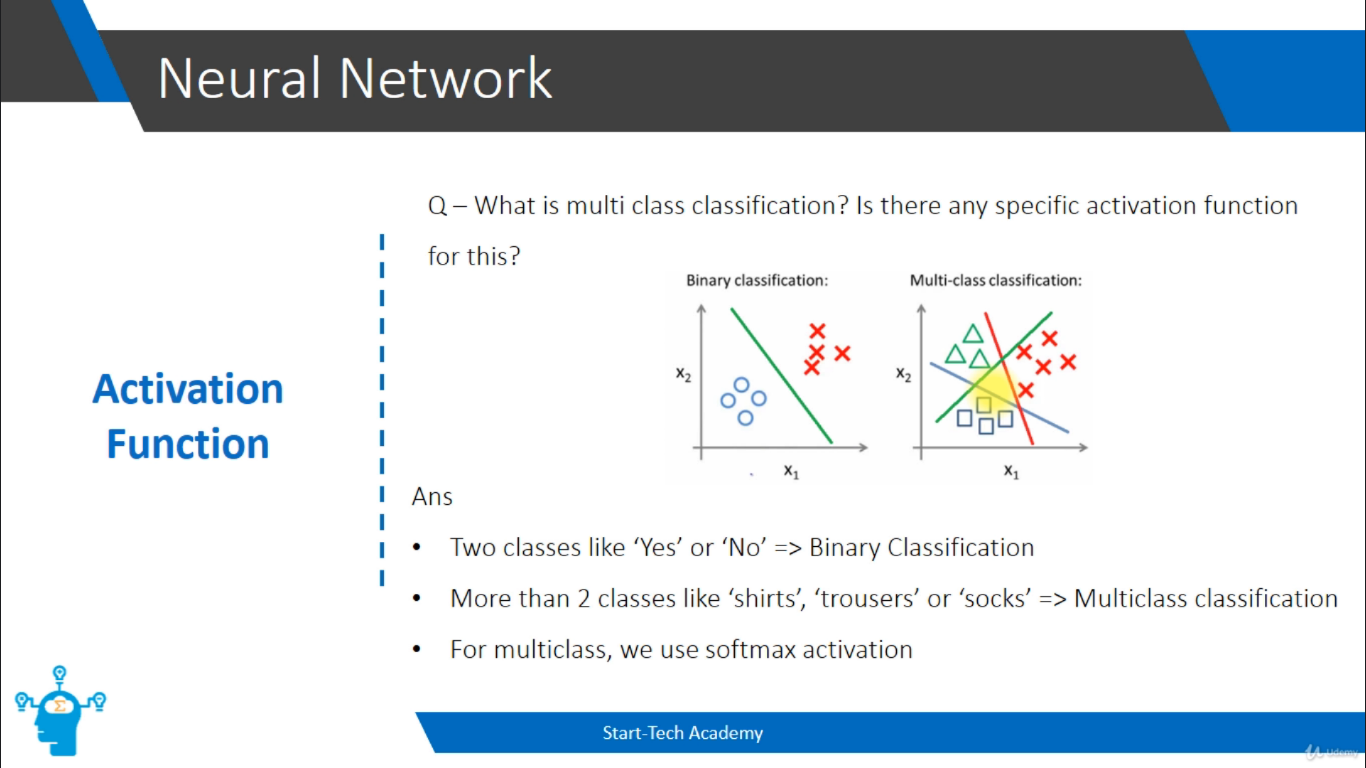

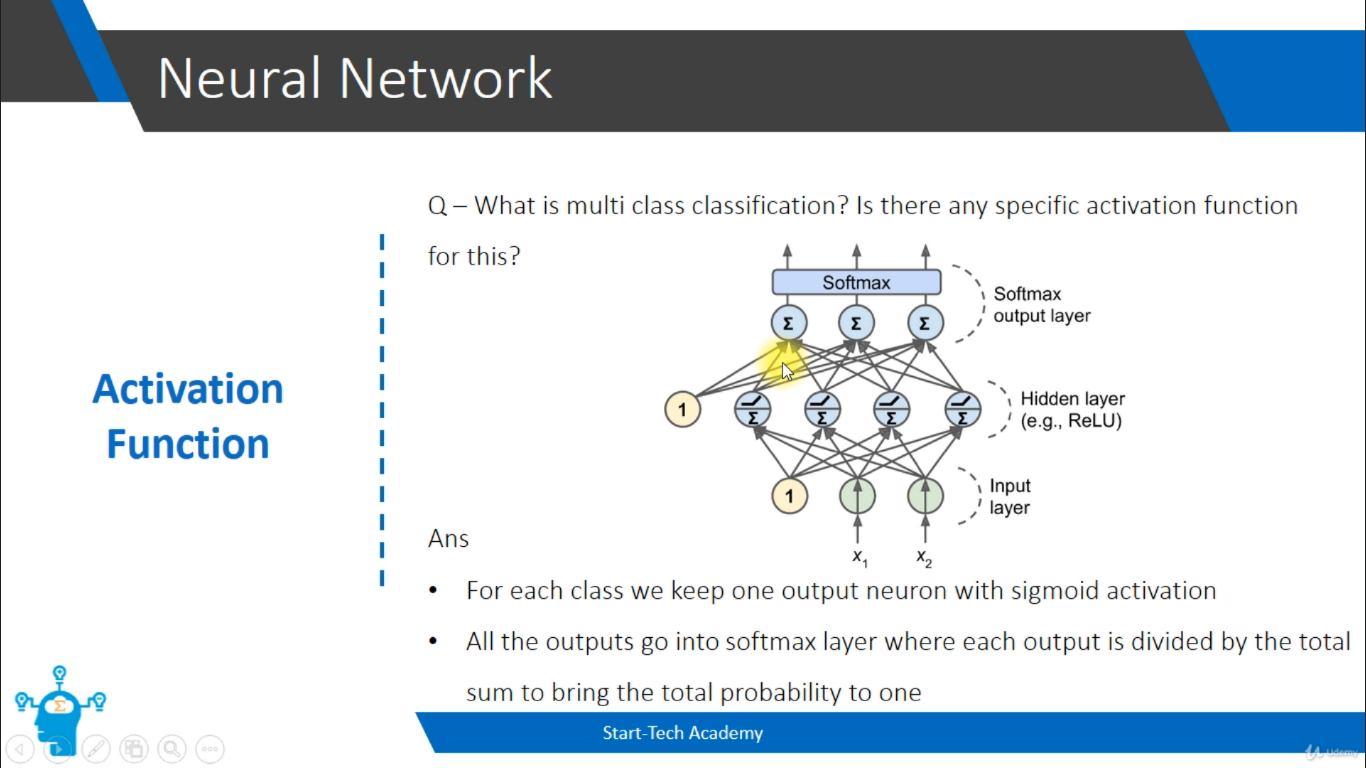

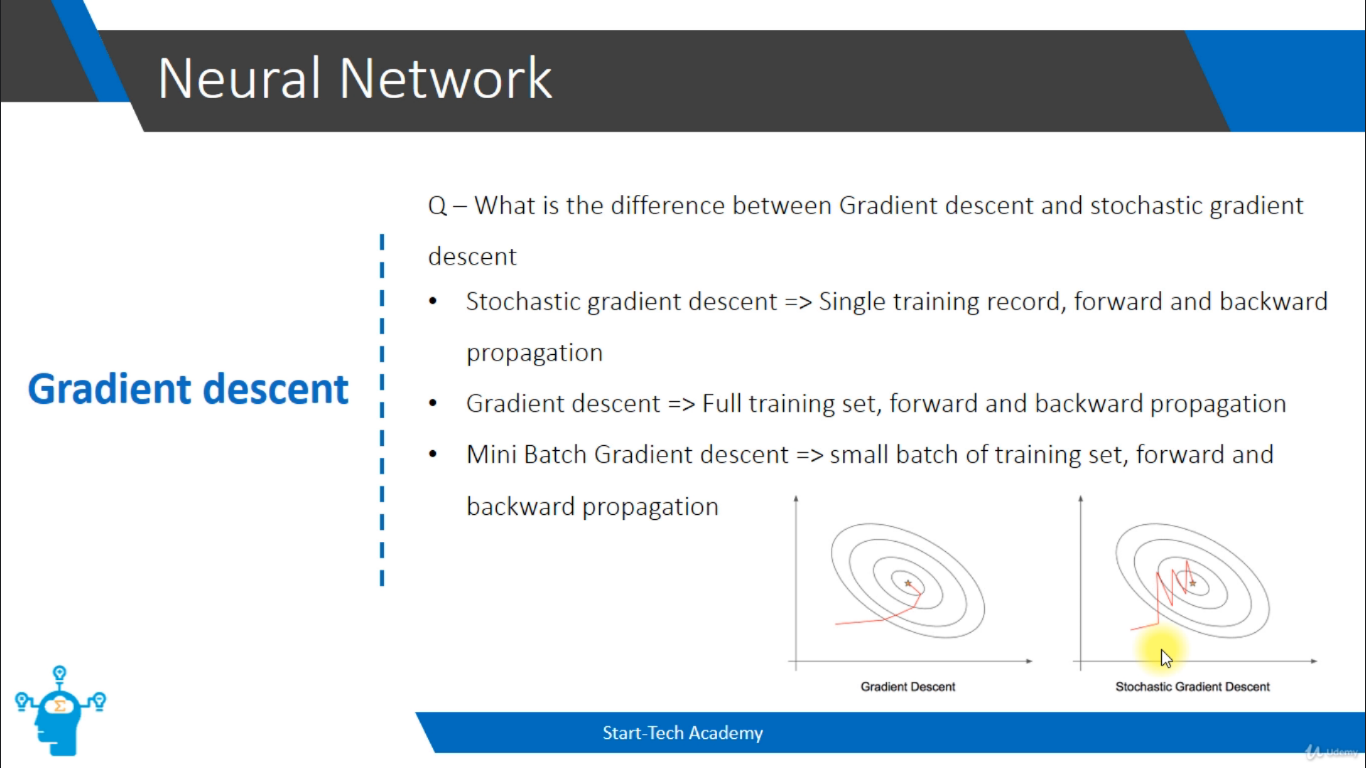

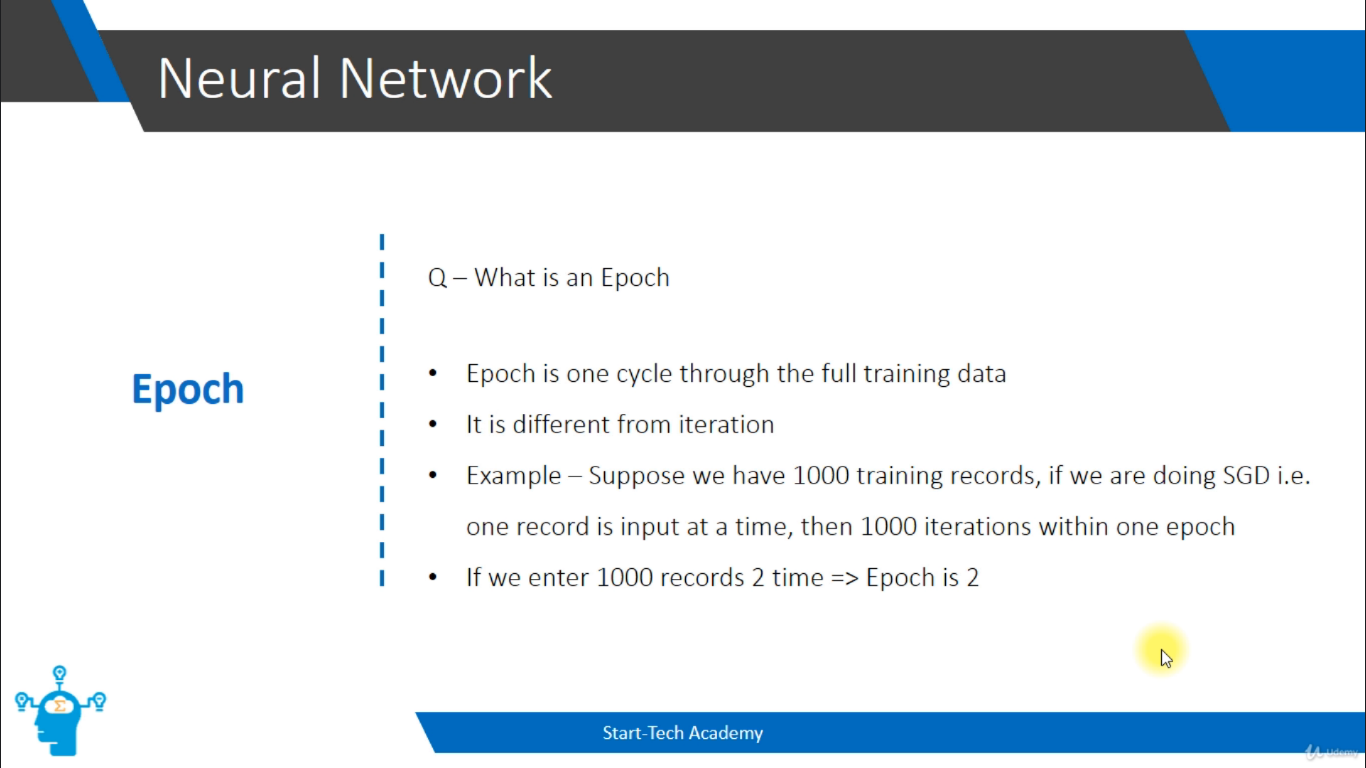

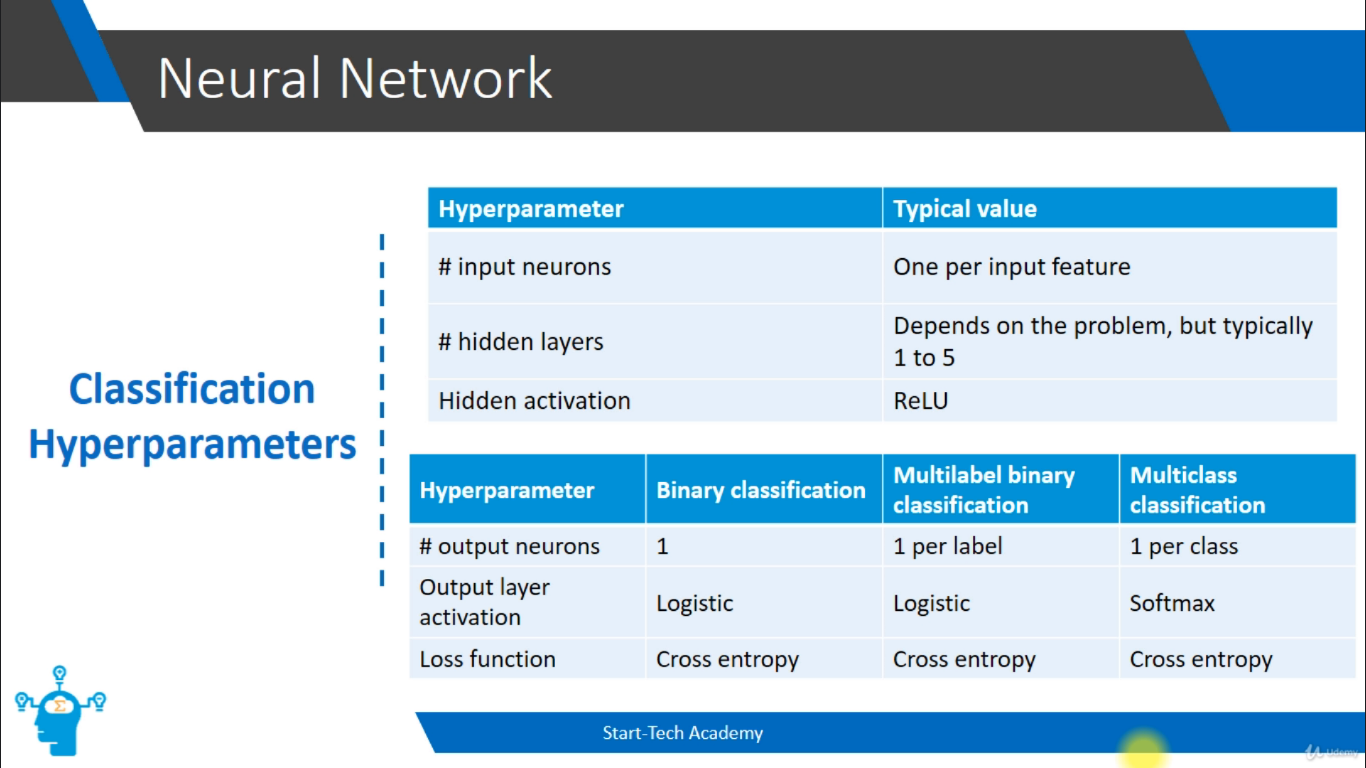

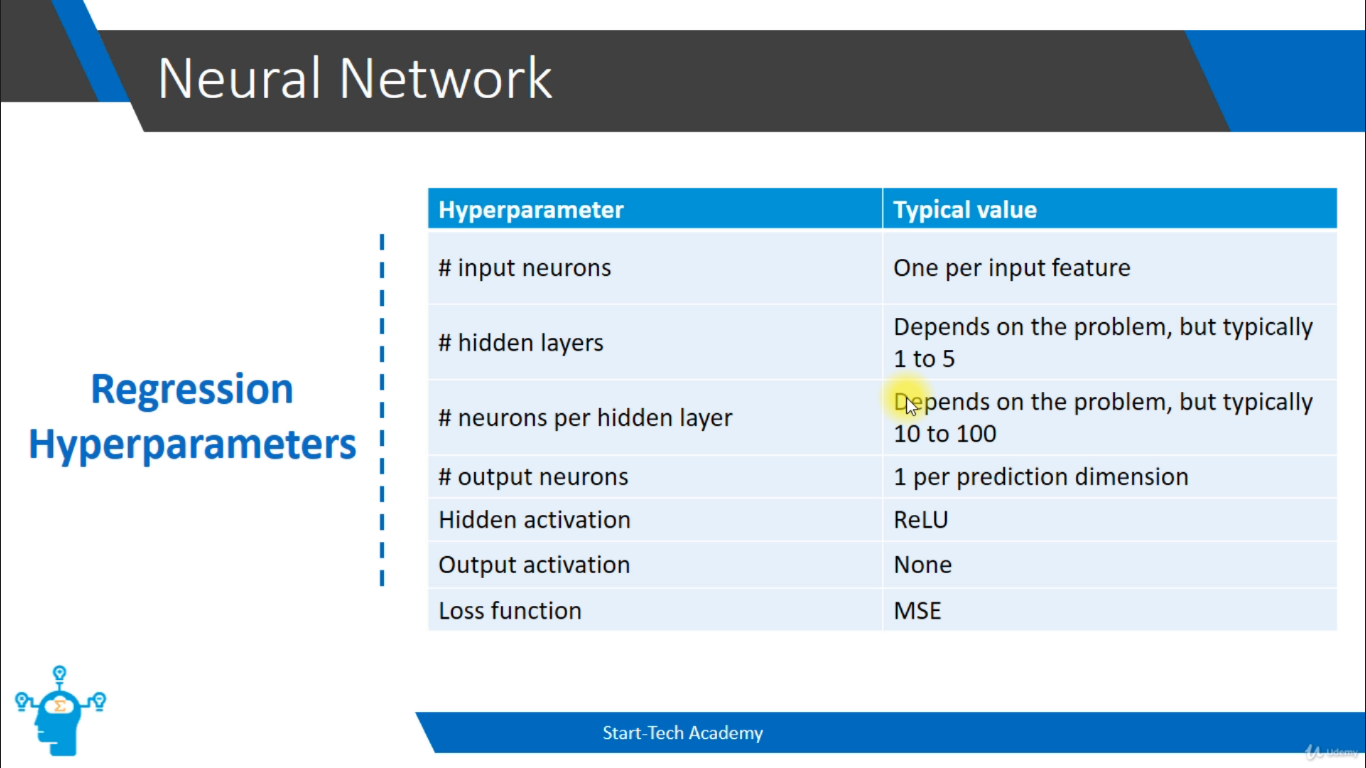

# Tensorflow & Keras

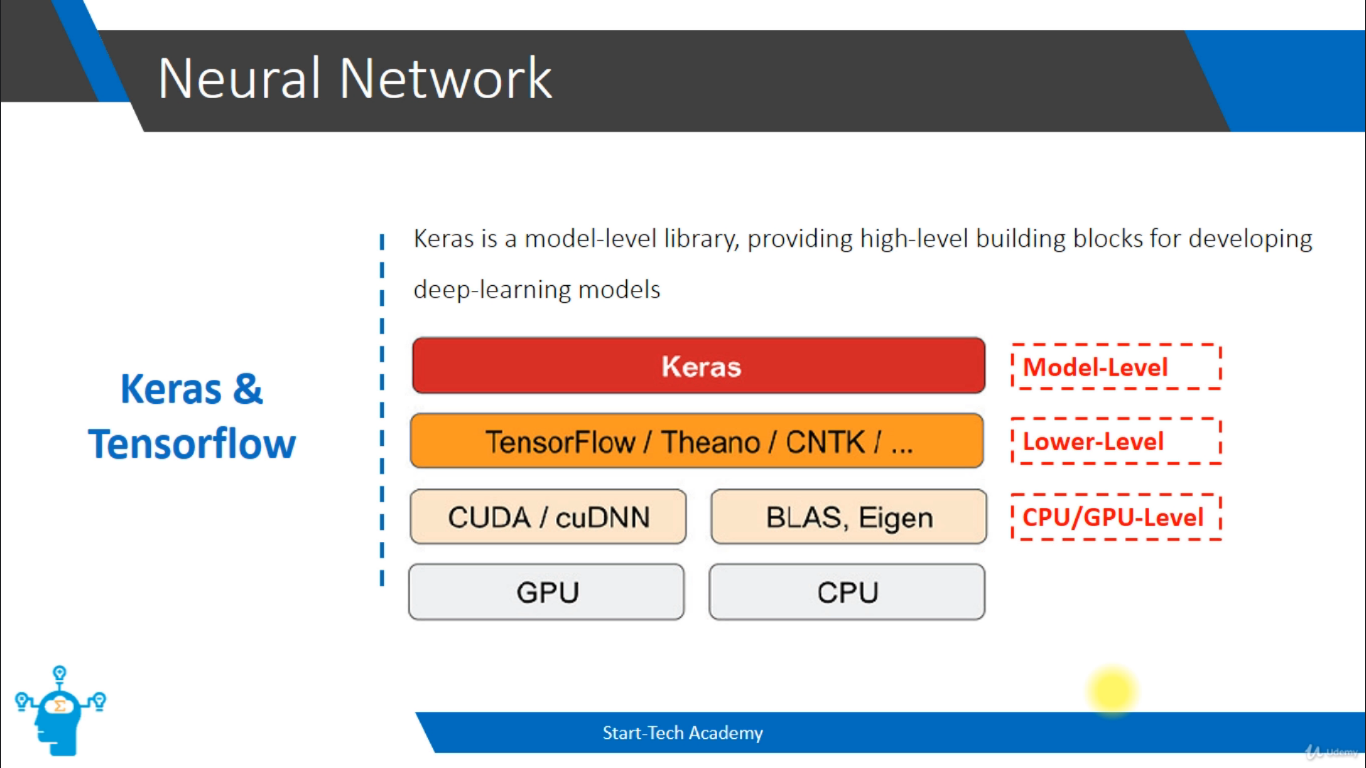

**Keras** is a **deep learning framework** that provides a convenient way to define and train almost any kind of deep learning model. Basically, Keras works at the **model level**. It will help you define the model. That is how many **layers**. How many **hidden layers**. What does the **error function**? What is the **optimizer**, etc. But it does **not handle** the **lower level operations**.

We learned that while training a neural network, we need a lot of **differentiation**, **matrix manipulation**, etc., all these are **not** done by **Keras**. Instead, this low level manipulation and differentiation of data is done by certain specialized and well optimized libraries. Good thing about Keras is that it can work seamlessly with several such **lower-level libraries**. Currently, there are **three main backend libraries**. **TensorFlow**, which is developed by Google. **CNTK** which stands for Cognitive Toolkit and is developed by Microsoft and **Theano**, which is developed by Mila Lab at University of Montreal.

Any piece of **code** written in **Keras** can be run with any of these backends without having to change anything in the code. But as of now, **Tensorflow** is the **most widely adopted**, **more scalable** and **most production ready**.

Now, Tensorflow or any other such low level library. These **libraries need processing power** from our system to do all this data manipulation. This processing power can be provided by either **CPU** or **GPU**, which stands for **Central Processing Unit** or the **Graphical processing Unit**. 

By default we do a CPU based installation of Keras and TensorFlow but if you are running on a system with Nvidia GPU and a properly configured libraries of Nvidia such as CUDA and cuDNN which are for deep learning, then you can install the GPU based version of the TensorFlow backend engine as well.

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
%matplotlib inline

In [3]:
keras.__version__

'2.8.0'

In [4]:
tf.__version__

'2.8.2'

# Load Data

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
X_train_full[0].shape

(28, 28)

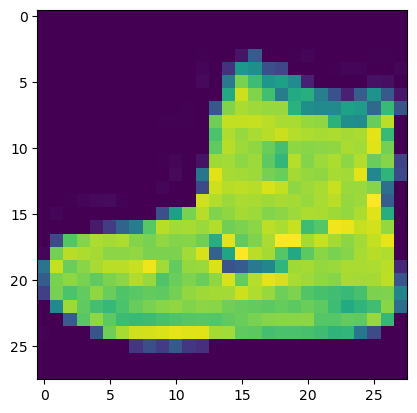

In [9]:
plt.imshow(X_train_full[0])

In [10]:
y_train_full[0]

9

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train_full[0]]

'Ankle boot'

# Data Normalization

Since we are going to use gradient descent to compile our model, we need to normalize this pixel intensities. By normalizing, I mean, we have to restrict this pixel intensities between zero and one.

This normalization is different from the normalization we generally do for machine learning algorithms. Since here, we know that all these values are on an absolute scale of zero to 255. We can directly divide it by 255.

In [13]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

One thing you can notice is that we are **not dividing** it by **255**. We are **dividing** it by **255.** that is because we want the **final output** in the form of **floating numbers** between zero and one. If we divided it by just integer values of 255. So since the intensities are integer value, there might be some cases with some Python version where we get the output as integer since we want the whole greyscale between zero and one.

# Trian, Validation, Test Split

In [14]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [15]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Model Creation

There are **two APIs** for **defining a model** in **Keras**:
- **Sequential** model API: Sequential api is a **straight forward** and **simple**
- **Functional** API: whereas functional api is **little bit complex**, but it will give you the **flexibility** to create some **complex neural networks**.

Sequential Api is useful to create layer by layer models, where all the outputs of **previous layer** are **connected** as inputs of the **next layer** and so on. So for a **simple neural network** like this, sequential api is recommended.

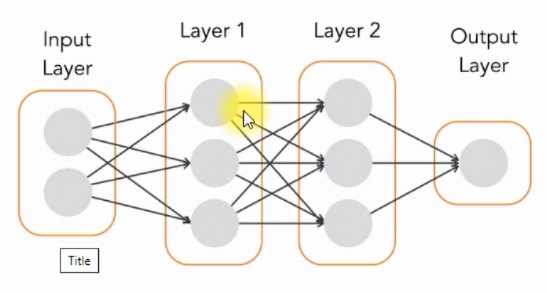

But for some advanced complex structure such as this, here we are using input as an input for concat layer as well. So this layer have two inputs. One, all of our primary input parameters and the outputs of hidden layer as well. So anywhere if you want complex structure like this or you want to only use some part of your input in one hidden layer and other part of input in some other hidden layer, for all such variations, you can use functional api.

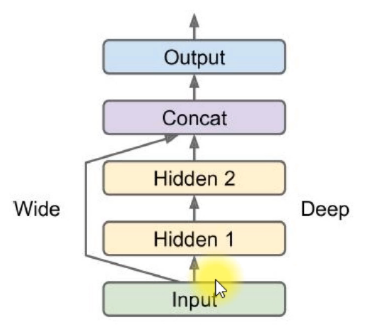

## Building Neural Network for Classification Problem

In [16]:
np.random.seed(42)
tf.random.set_seed(42)

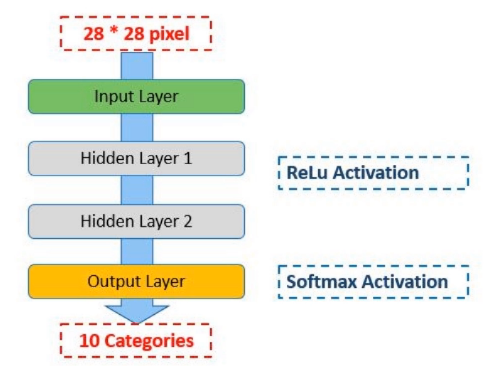

We are first converting our 2d observations into a flat 1d observations. So instead of a 2d array of 28 into 28 pixel. We want 784 pixel in our input layer.

Then we are going to create two hidden layers. The activation function, which we are going to use for hidden layers, will be relu, we always prefer RELU for classification models.

And in the output since this 10 categories are exclusive. and this is a classification model. We will be using softmax activation. softmax equates the sum of all the class probability to one.

In [17]:
model = keras.models.Sequential()

2022-10-28 15:53:33.728381: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 15:53:33.729662: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))

In [19]:
model.add(keras.layers.Dense(300, activation='relu'))

In [20]:
model.add(keras.layers.Dense(100, activation='relu'))

In [21]:
model.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Now, if you want to **look** at our **neural network**, you can do that using **pydot**.

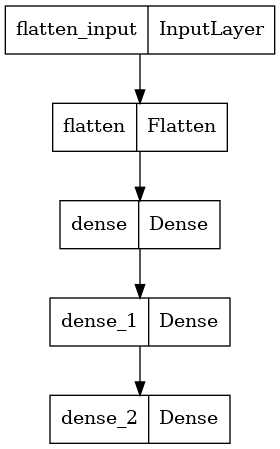

In [23]:
import pydot
keras.utils.plot_model(model)

So here we have input layer. Then we are flattenning the 2d array into a 1d array So that's why we have a flatten layer. And then we have 2 dense hidden layer And we have an output layer which is giving us the class probabilities.

In [24]:
weights, biases = model.layers[1].get_weights()

In [25]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
biases.shape

(300,)

## Training Neural Network Model

Now, before training this model, we need to **set up** the **learning processes**. And to do that, we will use the **compile method**. We will first give the **loss function**. Then we will give the **optimizer**. And then the **metrics** we want to calculate to judge the performance of our model

In [29]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

we are using **Loss function** as **sparse categorical cross entropy** We are using this because our **y** data is available in the form of **labels** in our data. If instant we had **probabilities per class** in our Y variable, then we had to use **Categorical Cross entropy**. And suppose we had **binary labels** such as yes or no or true or false. In that case, we had to use **Binary Cross entropy**.

Documentation - https://keras.io/models/sequential/

Then for optimizer, we are using sgd, sgd simply stands for stochastic gradient descent. In other words, we are just telling keras to perform back propagation algorithm and for metrics, we are using accuracy since we are building a classifier. We have to use accuracy. If you are using the regression model, you can use mean square error and so on.

In [30]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8316 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4391 - accuracy: 0.8456 - val_loss: 0.5317 - val_accuracy: 0.7986
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4123 - accuracy: 0.8565 - val_loss: 0.3918 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3938 - accuracy: 0.8624 - val_loss: 0.3746 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3750 - accuracy: 0.8675 - val_loss: 0.3712 - val_accuracy: 0.8740
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3631 - accuracy: 0.8720 - val_loss: 0.3622 - val_accuracy:

You can see at each epoch during the trianing, keras display the number of instances process. And then we are also getting the loss, accuracy, validation, loss and validation accuracy during each epoch.

One important parameter is class weights. So if you have some **uneven distribution** of your **classes** in youe y variable. So suppose all over 60000 reports, 50000 were shirts and rest if Nine categories are spread across the remaining 10000 records. Then we have to use **class weights** to give **larger weight** to **underrepresented classes** and to give **lower weights** to **over represened classes**. 

Since in our dataset the **categories** are **uniformly** spread and there is no uneven distribution of categories. After fitting your model you can call different attributes of our model than history object.

In [31]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [32]:
model_history.history

{'loss': [0.7237027883529663,
  0.48421013355255127,
  0.43914297223091125,
  0.4122786223888397,
  0.39377644658088684,
  0.375026136636734,
  0.3630618751049042,
  0.35167527198791504,
  0.341274619102478,
  0.3318203389644623,
  0.3238464593887329,
  0.31453484296798706,
  0.3075409531593323,
  0.30158886313438416,
  0.29426050186157227,
  0.28861168026924133,
  0.28331518173217773,
  0.2772739827632904,
  0.27225539088249207,
  0.26694345474243164,
  0.26211586594581604,
  0.25721824169158936,
  0.25313302874565125,
  0.248041570186615,
  0.24382317066192627,
  0.24011431634426117,
  0.23572058975696564,
  0.23247161507606506,
  0.22789357602596283,
  0.22474727034568787],
 'accuracy': [0.7643091082572937,
  0.8315636515617371,
  0.8455818295478821,
  0.8564909100532532,
  0.8624363541603088,
  0.8674908876419067,
  0.8720181584358215,
  0.8748000264167786,
  0.8793091177940369,
  0.8822181820869446,
  0.8837272524833679,
  0.8866000175476074,
  0.8895272612571716,
  0.891854524612

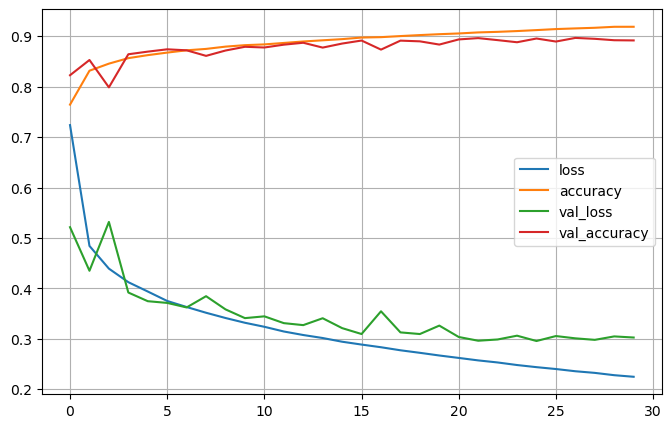

In [37]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid()

You can also tell that the **model** has **not converge** yet as the **validation accuracy** is still **going up** and the **validation loss** is still **going down**.

So for our next try, we should run it for some more epochs. And if you call the fit method again. Keras will continue to train this model where you left off.

## Evaluating Performance

In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3372 - accuracy: 0.8823


[0.3372093141078949, 0.8823000192642212]

So the **output** here is first the **loss** and then the **accuracy**.

This is accuracy because this is the metrics which we mention While compiling, we mentioned metrics equal to accuracy.

## Prediction

In [39]:
X_new = X_test[:3]

Right now we do not have any new data. We just taking first three samples from our test dataset and consider that as your new unseen data now. So there are **two parameters** which you can **predict**. First one is the **probability of each class** and second one is the **class itself**.

In [40]:
y_prob = model.predict(X_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.013, 0.   , 0.027, 0.001,
        0.959],
       [0.   , 0.   , 0.99 , 0.   , 0.01 , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [43]:
y_pred = np.argmax(y_prob, axis=1)
y_pred

array([9, 2, 1])

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

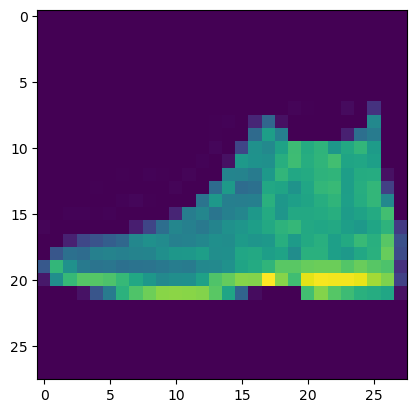

In [46]:
plt.imshow(X_test[0])

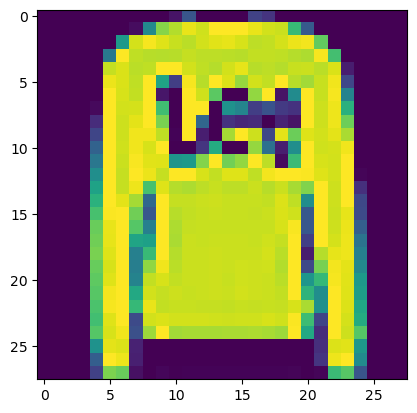

In [47]:
plt.imshow(X_test[1])

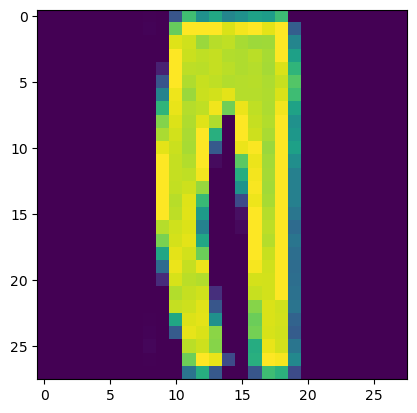

In [48]:
plt.imshow(X_test[2])